# New section

### Project Goals

> Find the main drivers of HDB resale prices

> Using dataset from data.gov.sg and also amenities close to a particular area

> Random Forest Model for prediction

### Loading of Data

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
sb.set()
from datetime import datetime

#### Decided to use the 1990 to current time dataset to clean

#### Finding out the shape and dtype of each column from 1990 dataset using `info` and `shape`

In [177]:
resale_1990 = pd.read_csv("content/resale-flat-prices-based-on-approval-date-1990-1999.csv")
resale_1990.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [178]:
resale_2000 = pd.read_csv("content/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")
resale_2000.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [179]:
resale_2012 = pd.read_csv("content/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv")
resale_2012.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [180]:
resale_first = pd.concat([resale_1990,resale_2000,resale_2012],axis=0,sort=False)
resale_first

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [181]:
resale_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709050 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                709050 non-null  object 
 1   town                 709050 non-null  object 
 2   flat_type            709050 non-null  object 
 3   block                709050 non-null  object 
 4   street_name          709050 non-null  object 
 5   storey_range         709050 non-null  object 
 6   floor_area_sqm       709050 non-null  float64
 7   flat_model           709050 non-null  object 
 8   lease_commence_date  709050 non-null  int64  
 9   resale_price         709050 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 59.5+ MB


In [182]:
count = 0
remaining_list = []
for i in resale_first.month:
  year = int(i[:4])
  remaining = 99 - (year - resale_first.lease_commence_date.iloc[count])
  remaining_list.append(remaining)
  count+=1

resale_first["remaining_lease"] = remaining_list
resale_first.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85


In [183]:
resale_2015 = pd.read_csv("content/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")
resale_2015.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [184]:
resale_2015.shape

(37153, 11)

In [185]:
resale_2015.info() # we know that there are no NaN values in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


#### Finding out the shape and dtype of each column from 2017 dataset using `info` and `shape`

In [186]:
resale_current = pd.read_csv("content/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")
resale_current.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [187]:
resale_current.shape

(122006, 11)

In [188]:
resale_current.info() #we know there are no NaN values as well in all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122006 entries, 0 to 122005
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                122006 non-null  object 
 1   town                 122006 non-null  object 
 2   flat_type            122006 non-null  object 
 3   block                122006 non-null  object 
 4   street_name          122006 non-null  object 
 5   storey_range         122006 non-null  object 
 6   floor_area_sqm       122006 non-null  float64
 7   flat_model           122006 non-null  object 
 8   lease_commence_date  122006 non-null  int64  
 9   remaining_lease      122006 non-null  object 
 10  resale_price         122006 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 10.2+ MB


In [189]:
# Concatenate both the datasets
resale_total = pd.concat([resale_2015,resale_current],axis=0,sort=False)
resale_first = resale_first.reindex(columns=resale_total.columns)
resale_total = pd.concat([resale_first,resale_total],axis=0,sort=False)
resale_total.month = pd.to_datetime(resale_total.month) #to date time

resale_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868209 entries, 0 to 122005
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                868209 non-null  datetime64[ns]
 1   town                 868209 non-null  object        
 2   flat_type            868209 non-null  object        
 3   block                868209 non-null  object        
 4   street_name          868209 non-null  object        
 5   storey_range         868209 non-null  object        
 6   floor_area_sqm       868209 non-null  float64       
 7   flat_model           868209 non-null  object        
 8   lease_commence_date  868209 non-null  int64         
 9   remaining_lease      868209 non-null  object        
 10  resale_price         868209 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 79.5+ MB


### Data Cleaning
*   Change names of the duplicate flat models
*   Adjust resale prices according to inflation 
*   Converting remaining_lease to years









In [190]:
resale_total

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,86,9000.0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,86,6000.0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,86,8000.0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,86,6000.0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,85,47200.0
...,...,...,...,...,...,...,...,...,...,...,...
122001,2022-03-01,YISHUN,EXECUTIVE,359,YISHUN RING RD,01 TO 03,145.0,Apartment,1988,65 years 05 months,682000.0
122002,2022-03-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,65 years 04 months,720000.0
122003,2022-03-01,YISHUN,EXECUTIVE,355,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,65 years 08 months,800000.0
122004,2022-03-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,10 TO 12,146.0,Maisonette,1985,62 years 06 months,788000.0


#### Converting remaining_lease to years

In [191]:
def convert(lease):
  if type(lease) is str:
    length = [int(years) for years in lease.split() if years.isdigit()]
    if len(length)>1:
      final = length[0] + (length[1])/12
    else:
      final = length[0]
    return final
  else:
    return lease

In [192]:
resale_total.remaining_lease = resale_total.remaining_lease.apply(lambda x: convert(x))
resale_total

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,86.000000,9000.0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,86.000000,6000.0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,86.000000,8000.0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,86.000000,6000.0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,85.000000,47200.0
...,...,...,...,...,...,...,...,...,...,...,...
122001,2022-03-01,YISHUN,EXECUTIVE,359,YISHUN RING RD,01 TO 03,145.0,Apartment,1988,65.416667,682000.0
122002,2022-03-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,65.333333,720000.0
122003,2022-03-01,YISHUN,EXECUTIVE,355,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,65.666667,800000.0
122004,2022-03-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,10 TO 12,146.0,Maisonette,1985,62.500000,788000.0


In [193]:
resale_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868209 entries, 0 to 122005
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                868209 non-null  datetime64[ns]
 1   town                 868209 non-null  object        
 2   flat_type            868209 non-null  object        
 3   block                868209 non-null  object        
 4   street_name          868209 non-null  object        
 5   storey_range         868209 non-null  object        
 6   floor_area_sqm       868209 non-null  float64       
 7   flat_model           868209 non-null  object        
 8   lease_commence_date  868209 non-null  int64         
 9   remaining_lease      868209 non-null  float64       
 10  resale_price         868209 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 79.5+ MB


In [194]:
resale_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868209 entries, 0 to 122005
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                868209 non-null  datetime64[ns]
 1   town                 868209 non-null  object        
 2   flat_type            868209 non-null  object        
 3   block                868209 non-null  object        
 4   street_name          868209 non-null  object        
 5   storey_range         868209 non-null  object        
 6   floor_area_sqm       868209 non-null  float64       
 7   flat_model           868209 non-null  object        
 8   lease_commence_date  868209 non-null  int64         
 9   remaining_lease      868209 non-null  float64       
 10  resale_price         868209 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 79.5+ MB


#### Changing duplicate names of flat models

In [195]:
resale_total.flat_model.unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft'], dtype=object)

In [196]:
resale_total.flat_model.value_counts()

Model A                   171894
Improved                  154142
New Generation            103347
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          40399
Simplified                 32108
Apartment                  23717
Standard                   23685
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 15983
MAISONETTE                 12215
APARTMENT                   9901
Model A2                    9492
DBSS                        2601
Adjoined flat               1155
Model A-Maisonette           993
MODEL A-MAISONETTE           982
Terrace                      423
Type S1                      361
MULTI GENERATION             279
Multi Generation             250
TERRACE                      247
Type S2                      186
Premium Apartment Loft        85
Premium Maisonette            85
Improved-Maisonette           74
IMPROVED-MAISONETTE           44
2-room    

In [197]:
'''rename Improved-Maisonette to Executive Maisonette
Premium Maisonette to Executive Maisonette
Model A-Maisonette to Maisonette
Premium Apartment Loft to Premium Apartment
Type S1 and S2 to TypeS1S2'''

def change_model(model):
  if model == "Improved-Maisonette" or model == "Premium Maisonette" or model == "IMPROVED-MAISONETTE":
    rename = "Executive Maisonette"
  elif model == "Model A-Maisonette" or model=="MODEL A-MAISONETTE" or model=="MAISONETTE":
    rename = "Maisonette"
  elif model == "Premium Apartment Loft" or model=="PREMIUM APARTMENT":
    rename = "Premium Apartment"
  elif model == "Type S1" or model == "Type S2":
    rename = "Type S1S2"
  elif model == "DBSS":
    rename = "DBSS"
  else:
    complete = ""
    split = model.split()
    if len(split) == 1:
      return model[0] + model[1:].lower()
    else:
      for i in split:
        complete += (i[0] + i[1:].lower() + " ")
      if complete[-1]==" ":
        complete = complete[0:-1]
      return complete
  return rename

In [198]:
resale_total.flat_model = resale_total.flat_model.apply(lambda x:change_model(x))
resale_total.flat_model.unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Maisonette', 'Apartment', 'Terrace', '2-room',
       'Executive Maisonette', 'Multi Generation', 'Premium Apartment',
       'Adjoined flat', 'Model A2', 'DBSS', 'Type S1S2'], dtype=object)

In [199]:
resale_total.flat_model.value_counts()

Model A                 242275
Improved                227731
New Generation          182245
Simplified               55366
Standard                 41060
Premium Apartment        40490
Apartment                33618
Maisonette               30173
Model A2                  9492
DBSS                      2601
Adjoined flat             1155
Terrace                    670
Type S1S2                  547
Multi Generation           529
Executive Maisonette       203
2-room                      54
Name: flat_model, dtype: int64

In [200]:
resale_total["storey_range"] = resale_total["storey_range"].apply(lambda x:x[:2])
resale_total.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10,31.0,Improved,1977,86.0,9000.0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04,31.0,Improved,1977,86.0,6000.0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10,31.0,Improved,1977,86.0,8000.0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07,31.0,Improved,1977,86.0,6000.0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04,73.0,New Generation,1976,85.0,47200.0


#### Adjusting Resale prices using inflation using CPI

In [201]:
# https://www.singstat.gov.sg/find-data/search-by-theme/economy/prices-and-price-indices/latest-data
CPI = pd.read_excel('content/CPI_2022.xlsx')
CPI.head()

,Variables,1961 Jan,1961 Feb,1961 Mar,1961 Apr,1961 May,1961 Jun,1961 Jul,1961 Aug,1961 Sep,...,2021 May,2021 Jun,2021 Jul,2021 Aug,2021 Sep,2021 Oct,2021 Nov,2021 Dec,2022 Jan,2022 Feb
0,All Items,24.542,24.565,24.585,24.187,24.053,24.223,24.276,24.517,24.393,...,101.883,101.87,101.672,102.231,102.657,102.95,103.959,104.439,104.472,105.379
1,Food,21.762,21.777,21.82,21.172,20.967,21.242,21.323,21.699,21.506,...,103.026,103.104,103.246,103.509,103.725,103.874,104.147,104.373,105.197,105.299
2,Food Excl Food Serving Services,na,na,na,na,na,na,na,na,na,...,104.184,104.123,104.369,104.594,105.026,105.201,105.717,106.002,107.362,106.567
3,Bread & Cereals,na,na,na,na,na,na,na,na,na,...,102.595,102.541,102.457,102.183,102.568,103.776,103.348,103.131,103.252,103.513
4,Rice,na,na,na,na,na,na,na,na,na,...,100.449,100.257,99.679,98.511,98.74,101.35,99.869,97.79,96.615,96.464


In [202]:
CPI_rate = pd.DataFrame(CPI.loc[0,'1990 Jan':]).reset_index()
CPI_rate.rename(columns={'index':'month',0:'CPI rates'},inplace=True)
CPI_rate

,month,CPI rates
0,1990 Jan,61.966
1,1990 Feb,62.087
2,1990 Mar,61.907
3,1990 Apr,62.254
4,1990 May,62.415
...,...,...
381,2021 Oct,102.95
382,2021 Nov,103.959
383,2021 Dec,104.439
384,2022 Jan,104.472


In [203]:
CPI_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   month      386 non-null    object
 1   CPI rates  386 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


In [204]:
# changing the month format
CPI_rate.month = pd.to_datetime(CPI_rate.month,format='%Y %b')
CPI_rate['CPI rates'] = pd.to_numeric(CPI_rate['CPI rates'])
CPI_rate.head()

,month,CPI rates
0,1990-01-01,61.966
1,1990-02-01,62.087
2,1990-03-01,61.907
3,1990-04-01,62.254
4,1990-05-01,62.415


In [205]:
CPI_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   month      386 non-null    datetime64[ns]
 1   CPI rates  386 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.2 KB


In [206]:
#merging and then calculating adjusted resale price
resale_total = resale_total.merge(CPI_rate,on='month',how='left')
resale_total

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,CPI rates
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10,31.0,Improved,1977,86.000000,9000.0,61.966
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04,31.0,Improved,1977,86.000000,6000.0,61.966
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10,31.0,Improved,1977,86.000000,8000.0,61.966
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07,31.0,Improved,1977,86.000000,6000.0,61.966
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04,73.0,New Generation,1976,85.000000,47200.0,61.966
...,...,...,...,...,...,...,...,...,...,...,...,...
868204,2022-03-01,YISHUN,EXECUTIVE,359,YISHUN RING RD,01,145.0,Apartment,1988,65.416667,682000.0,NaN
868205,2022-03-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,04,146.0,Maisonette,1988,65.333333,720000.0,NaN
868206,2022-03-01,YISHUN,EXECUTIVE,355,YISHUN RING RD,10,146.0,Maisonette,1988,65.666667,800000.0,NaN
868207,2022-03-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,10,146.0,Maisonette,1985,62.500000,788000.0,NaN


In [207]:
resale_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868209 entries, 0 to 868208
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                868209 non-null  datetime64[ns]
 1   town                 868209 non-null  object        
 2   flat_type            868209 non-null  object        
 3   block                868209 non-null  object        
 4   street_name          868209 non-null  object        
 5   storey_range         868209 non-null  object        
 6   floor_area_sqm       868209 non-null  float64       
 7   flat_model           868209 non-null  object        
 8   lease_commence_date  868209 non-null  int64         
 9   remaining_lease      868209 non-null  float64       
 10  resale_price         868209 non-null  float64       
 11  CPI rates            867233 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 86.1

In [208]:
real_price=[]
count = 0
for i in resale_total['CPI rates']:
  if np.isnan(i):
    real_price.append(resale_total['resale_price'].iloc[count])
  else:
    real_price.append((resale_total['resale_price'].iloc[count]/i)*100)
  count+=1

In [209]:
resale_total['real_price'] = real_price
resale_total

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,CPI rates,real_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10,31.0,Improved,1977,86.000000,9000.0,61.966,14524.093858
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04,31.0,Improved,1977,86.000000,6000.0,61.966,9682.729239
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10,31.0,Improved,1977,86.000000,8000.0,61.966,12910.305651
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07,31.0,Improved,1977,86.000000,6000.0,61.966,9682.729239
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04,73.0,New Generation,1976,85.000000,47200.0,61.966,76170.803344
...,...,...,...,...,...,...,...,...,...,...,...,...,...
868204,2022-03-01,YISHUN,EXECUTIVE,359,YISHUN RING RD,01,145.0,Apartment,1988,65.416667,682000.0,NaN,682000.000000
868205,2022-03-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,04,146.0,Maisonette,1988,65.333333,720000.0,NaN,720000.000000
868206,2022-03-01,YISHUN,EXECUTIVE,355,YISHUN RING RD,10,146.0,Maisonette,1988,65.666667,800000.0,NaN,800000.000000
868207,2022-03-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,10,146.0,Maisonette,1985,62.500000,788000.0,NaN,788000.000000


### Taking out all the 2022 March because CPI rates are not out yet for the month of march

In [210]:
resale_total.drop(resale_total[resale_total.month == "2022-03-01"].index,inplace=True)
resale_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867233 entries, 0 to 867232
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                867233 non-null  datetime64[ns]
 1   town                 867233 non-null  object        
 2   flat_type            867233 non-null  object        
 3   block                867233 non-null  object        
 4   street_name          867233 non-null  object        
 5   storey_range         867233 non-null  object        
 6   floor_area_sqm       867233 non-null  float64       
 7   flat_model           867233 non-null  object        
 8   lease_commence_date  867233 non-null  int64         
 9   remaining_lease      867233 non-null  float64       
 10  resale_price         867233 non-null  float64       
 11  CPI rates            867233 non-null  float64       
 12  real_price           867233 non-null  float64       
dtypes: datetime64[

## Exploratory Data Analysis

*   Data visualisation
*   Distance to nearest MRT
*   Number of ammementies nearby


In [211]:
resale_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867233 entries, 0 to 867232
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                867233 non-null  datetime64[ns]
 1   town                 867233 non-null  object        
 2   flat_type            867233 non-null  object        
 3   block                867233 non-null  object        
 4   street_name          867233 non-null  object        
 5   storey_range         867233 non-null  object        
 6   floor_area_sqm       867233 non-null  float64       
 7   flat_model           867233 non-null  object        
 8   lease_commence_date  867233 non-null  int64         
 9   remaining_lease      867233 non-null  float64       
 10  resale_price         867233 non-null  float64       
 11  CPI rates            867233 non-null  float64       
 12  real_price           867233 non-null  float64       
dtypes: datetime64[

# analysis of catagorical variables

In [212]:
resaleCat_data = pd.DataFrame(resale_total[['town', 'flat_type', 'storey_range','flat_model']])
resaleCat_data.head()

,town,flat_type,storey_range,flat_model
0,ANG MO KIO,1 ROOM,10,Improved
1,ANG MO KIO,1 ROOM,04,Improved
2,ANG MO KIO,1 ROOM,10,Improved
3,ANG MO KIO,1 ROOM,07,Improved
4,ANG MO KIO,3 ROOM,04,New Generation


In [213]:
resaleCat_data = resaleCat_data.astype('category')

In [214]:
resaleCat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867233 entries, 0 to 867232
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   town          867233 non-null  category
 1   flat_type     867233 non-null  category
 2   storey_range  867233 non-null  category
 3   flat_model    867233 non-null  category
dtypes: category(4)
memory usage: 9.9 MB


In [215]:
resaleCat_data.describe()

,town,flat_type,storey_range,flat_model
count,867233,867233,867233,867233
unique,27,8,22,16
top,TAMPINES,4 ROOM,04,Model A
freq,76088,326468,218975,241952


In [216]:
resaleCat_data["town"].nunique() #27 unique towns

27

In [217]:
resaleCat_data["town"].value_counts()

TAMPINES           76088
YISHUN             65758
BEDOK              63627
JURONG WEST        62871
WOODLANDS          60999
ANG MO KIO         49749
HOUGANG            47570
BUKIT BATOK        41518
CHOA CHU KANG      35481
BUKIT MERAH        32121
PASIR RIS          31630
TOA PAYOH          29765
SENGKANG           27760
QUEENSTOWN         27269
CLEMENTI           26734
GEYLANG            26733
BUKIT PANJANG      25787
KALLANG/WHAMPOA    25265
JURONG EAST        23666
SERANGOON          21868
BISHAN             20350
PUNGGOL            16062
SEMBAWANG          11733
MARINE PARADE       7671
CENTRAL AREA        6702
BUKIT TIMAH         2392
LIM CHU KANG          64
Name: town, dtype: int64

From the describe table, `town` has the highest number of level as a categorical variable, with total value of 27. 

This means `town` has most number of unique items, its count being 27.

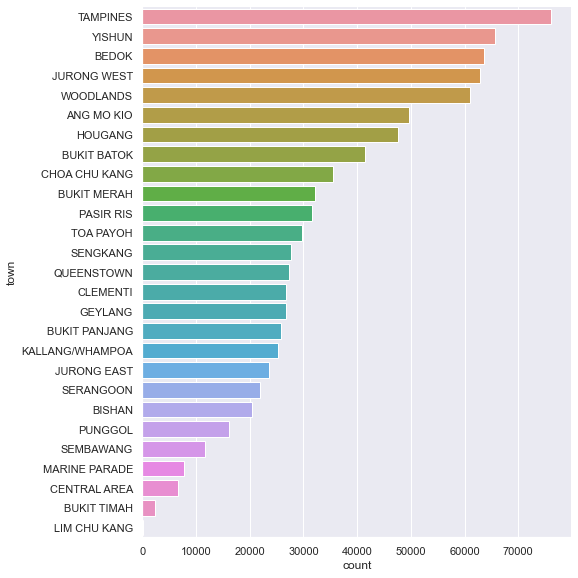

In [218]:
# Modified catplot for counts sorted by the counts
sb.catplot(y = 'town', data = resaleCat_data, 
           kind = "count", 
           height = 8, 
           order = resaleCat_data['town'].value_counts().index)

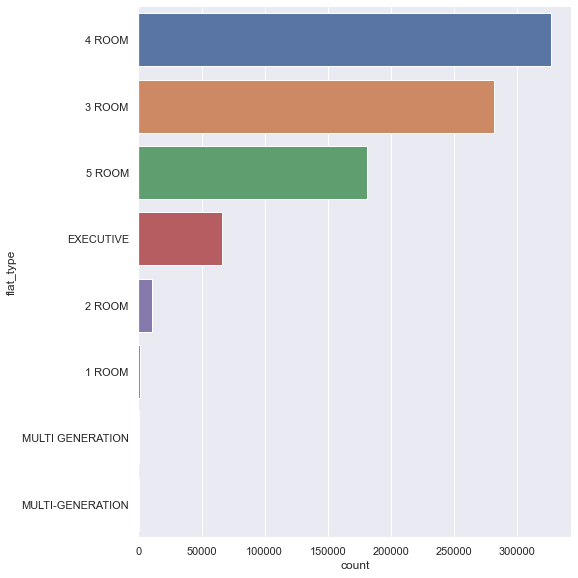

In [219]:
# Modified catplot for counts sorted by the counts
sb.catplot(y = 'flat_type', data = resaleCat_data, 
           kind = "count", 
           height = 8, 
           order = resaleCat_data['flat_type'].value_counts().index)

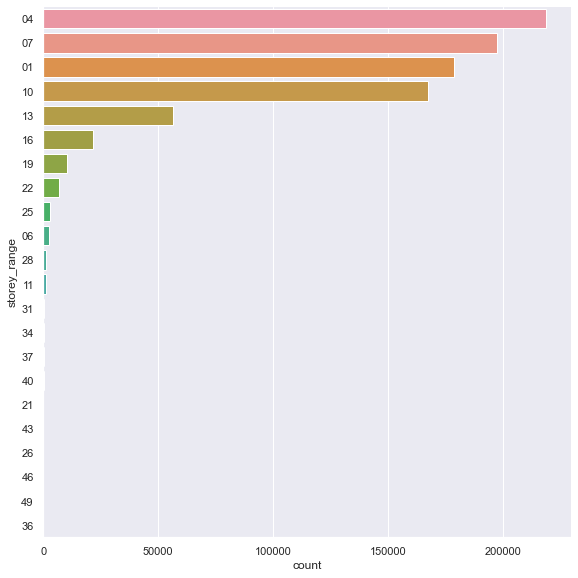

In [220]:
# Modified catplotstorey_rangefor counts sorted by the counts
sb.catplot(y = 'storey_range', data = resaleCat_data, 
           kind = "count", 
           height = 8, 
           order = resaleCat_data['storey_range'].value_counts().index)

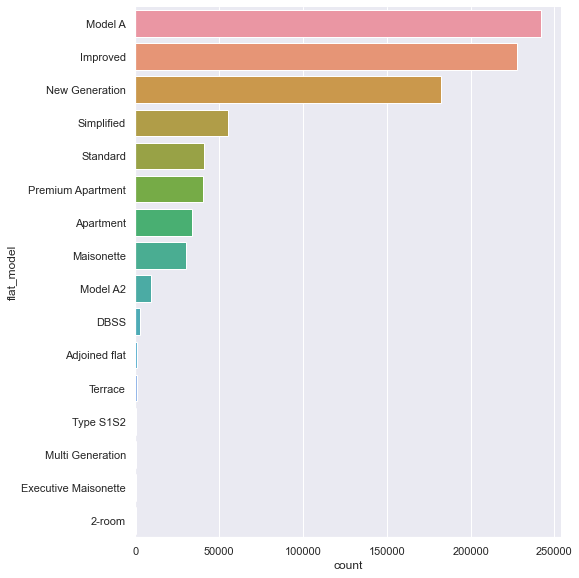

In [221]:
# Modified catplotstorey_rangefor counts sorted by the counts
sb.catplot(y = 'flat_model', data = resaleCat_data, 
           kind = "count", 
           height = 8, 
           order = resaleCat_data['flat_model'].value_counts().index)

Using the catplot, we can roughly gauge the distribution of data across the levels.

Generally, all variables are represented well, sorted by levels.

In [222]:
# Add SalePrice to the dataframe
resaleCat_data = pd.concat([resaleCat_data, resale_total["resale_price"]], axis = 1).reindex(resaleCat_data.index)
resaleCat_data.head()

,town,flat_type,storey_range,flat_model,resale_price
0,ANG MO KIO,1 ROOM,10,Improved,9000.0
1,ANG MO KIO,1 ROOM,04,Improved,6000.0
2,ANG MO KIO,1 ROOM,10,Improved,8000.0
3,ANG MO KIO,1 ROOM,07,Improved,6000.0
4,ANG MO KIO,3 ROOM,04,New Generation,47200.0


In [223]:
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

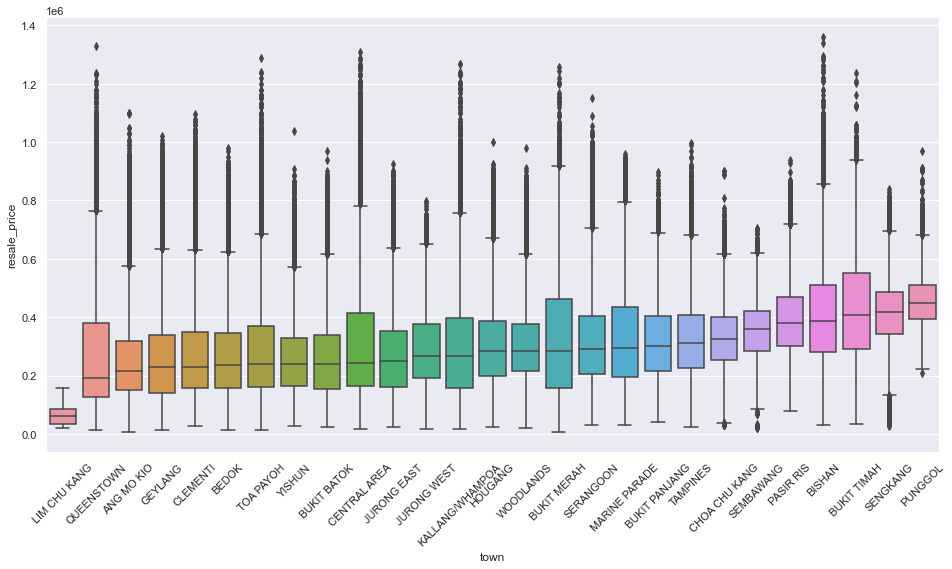

In [224]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'town', y = 'resale_price', data = resaleCat_data,order = resaleCat_data.groupby('town')['resale_price'].median().sort_values().index)
# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

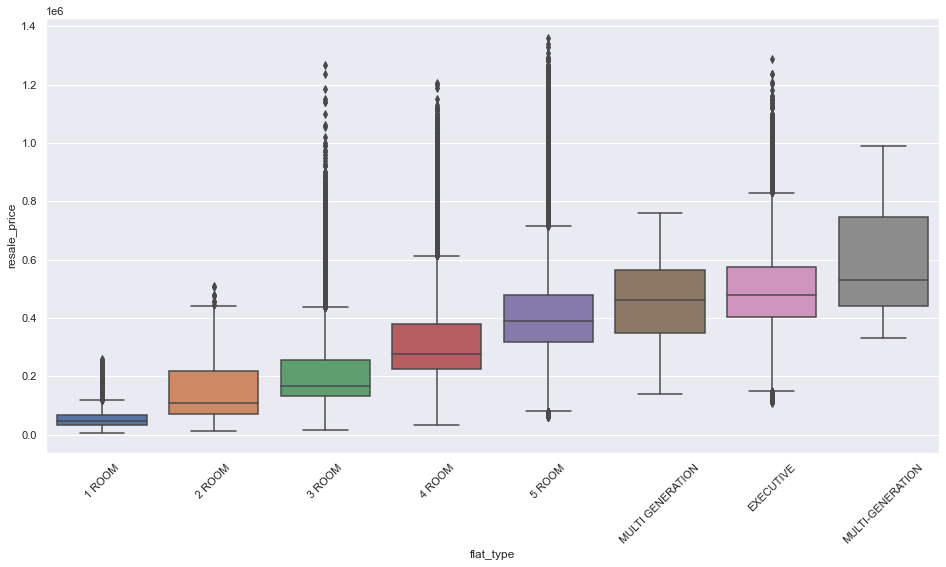

In [225]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'flat_type', y = 'resale_price', data = resaleCat_data, 
           order = resaleCat_data.groupby('flat_type')['resale_price'].median().sort_values().index)
# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

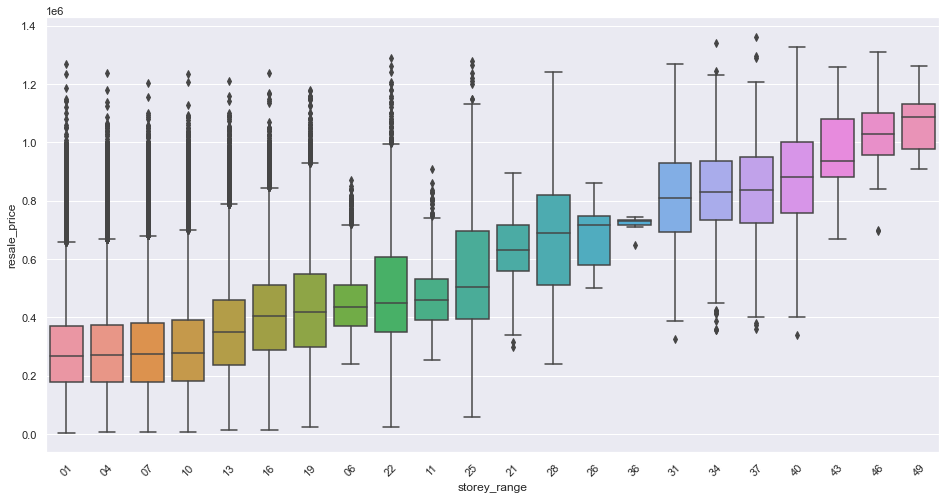

In [226]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'storey_range', y = 'resale_price', data = resaleCat_data, 
           order = resaleCat_data.groupby('storey_range')['resale_price'].median().sort_values().index)
# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

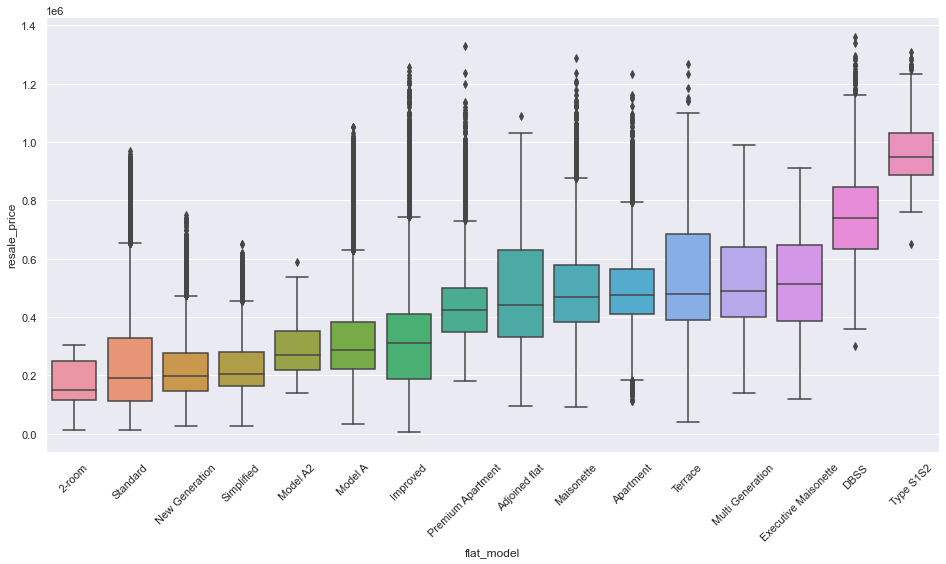

In [227]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'flat_model', y = 'resale_price', data = resaleCat_data, 
           order = resaleCat_data.groupby('flat_model')['resale_price'].median().sort_values().index)
# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

A strong increase trend of resale price with increase in `storey range` and `flat model`.

The highest variation in resale price is caused by `storey range`.

# Observation
Which variables would help us predict ‘Resale Price’ in this dataset?    

`Storey range` and `Flat level`: Very Important variables as they have highest variation in `Resale price` boxplots across categorical levels.

`Flat type`: Moderately important variables as there are quite variations in `Resale price` boxplots across categorical levels.

`Town`: Not clear if it is an important variable as there isn’t much variation in `Resale price` boxplots across categorical levels.

# Analysis of Numeric Variables

In [228]:
resaleNum_data = pd.DataFrame(resale_total[['floor_area_sqm', 'lease_commence_date', 'remaining_lease','CPI rates']])
resaleNum_data.head()

,floor_area_sqm,lease_commence_date,remaining_lease,CPI rates
0,31.0,1977,86.0,61.966
1,31.0,1977,86.0,61.966
2,31.0,1977,86.0,61.966
3,31.0,1977,86.0,61.966
4,73.0,1976,85.0,61.966


In [229]:
resaleNum_data.describe()

,floor_area_sqm,lease_commence_date,remaining_lease,CPI rates
count,867233.000000,867233.000000,867233.000000,867233.000000
mean,95.682997,1987.618258,81.581653,81.663246
std,25.960608,9.968877,10.194297,11.506234
min,28.000000,1966.000000,43.916667,61.907000
25%,73.000000,1980.000000,75.000000,73.408000
50%,93.000000,1986.000000,83.000000,76.051000
75%,113.000000,1995.000000,90.000000,93.842000
max,307.000000,2019.000000,101.000000,105.379000


From the describe table, we can observe the general distribution of the variables. `floor_area_sqm` has greatest standard deviation, indicating the datas are more spread out, and `lease_commence_date` has lowest standard deviation, indicating data are more clustered to the mean

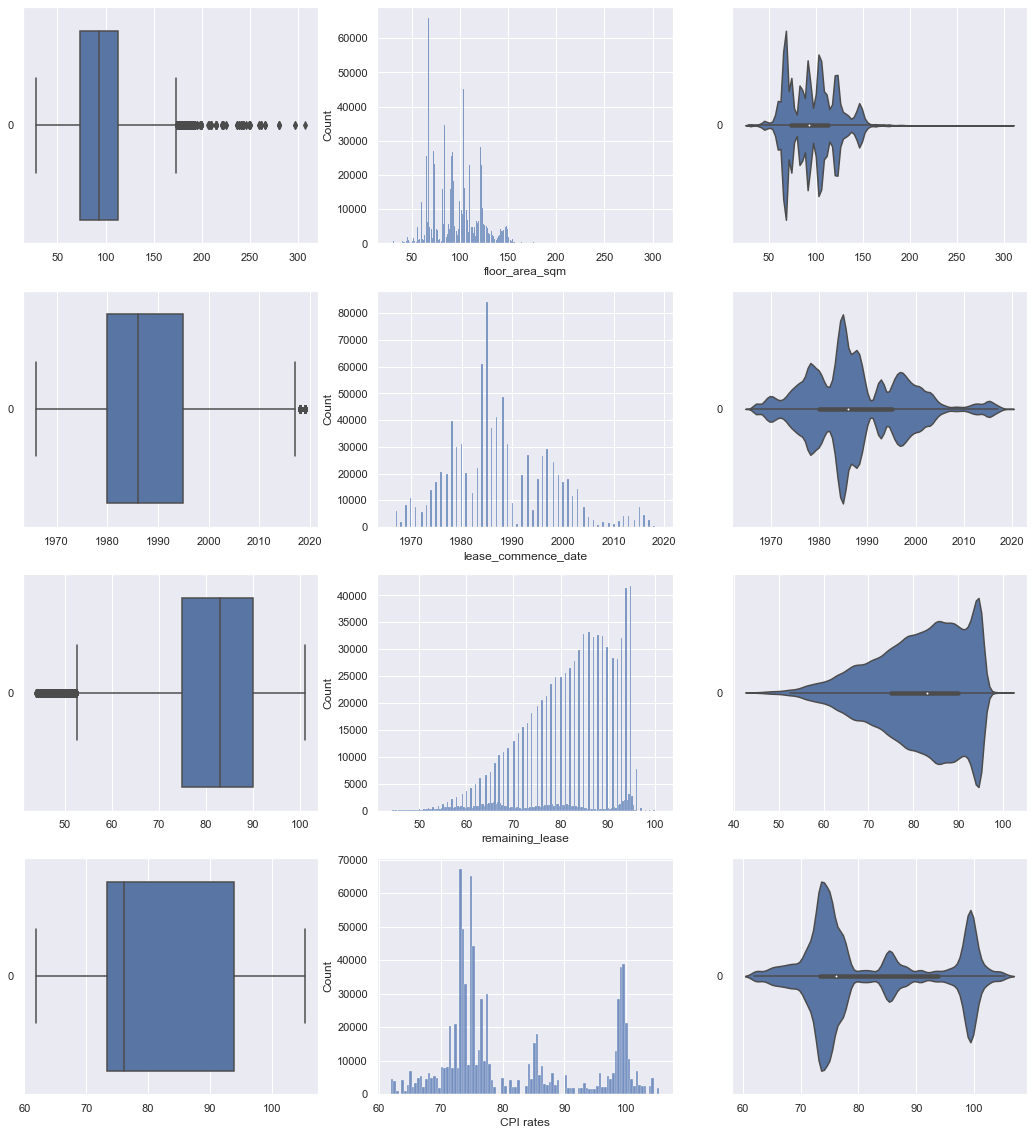

In [230]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 20))

count = 0
for var in resaleNum_data:
    sb.boxplot(data = resaleNum_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = resaleNum_data[var], ax = axes[count,1])
    sb.violinplot(data = resaleNum_data[var], orient = "h", ax = axes[count,2])
    count += 1

We can see floor_area_sqm seems to have most number of outliers, but there are possibility of `remaining_lease` having more outliers.

Remaining_lease has maximum skew, while `lease_commence_date` has minimum skew among the variables.

In [231]:
# Calculate the quartiles
Q1 = resaleNum_data.quantile(0.25)
Q3 = resaleNum_data.quantile(0.75)

# Rule to identify outliers
rule = ((resaleNum_data < (Q1 - 1.5 * (Q3 - Q1))) | (resaleNum_data > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

floor_area_sqm         2282
lease_commence_date     330
remaining_lease        4686
CPI rates                 0
dtype: int64

In [232]:
resaleNum_data.skew()

floor_area_sqm         0.371992
lease_commence_date    0.539835
remaining_lease       -0.680611
CPI rates              0.598315
dtype: float64

From counting number of outliers from each variables and computing the skewness, we can see in fact `remaining_lease` was the one with most number of outliers and maximum skewness (in terms of magnitude) 

The outliers for ‘remaining_lease’ are extremely concentrated in one area, while outliers for ‘floor_area_sqm’ are more spread out, making it difficult to tell there are actually most outliers for ‘remaining_lease’

                     floor_area_sqm  lease_commence_date  remaining_lease  \
floor_area_sqm             1.000000             0.432425         0.362236   
lease_commence_date        0.432425             1.000000         0.642298   
remaining_lease            0.362236             0.642298         1.000000   
CPI rates                  0.064701             0.375720        -0.442402   
resale_price               0.604313             0.516816        -0.023302   

                     CPI rates  resale_price  
floor_area_sqm        0.064701      0.604313  
lease_commence_date   0.375720      0.516816  
remaining_lease      -0.442402     -0.023302  
CPI rates             1.000000      0.667649  
resale_price          0.667649      1.000000  


<AxesSubplot:>

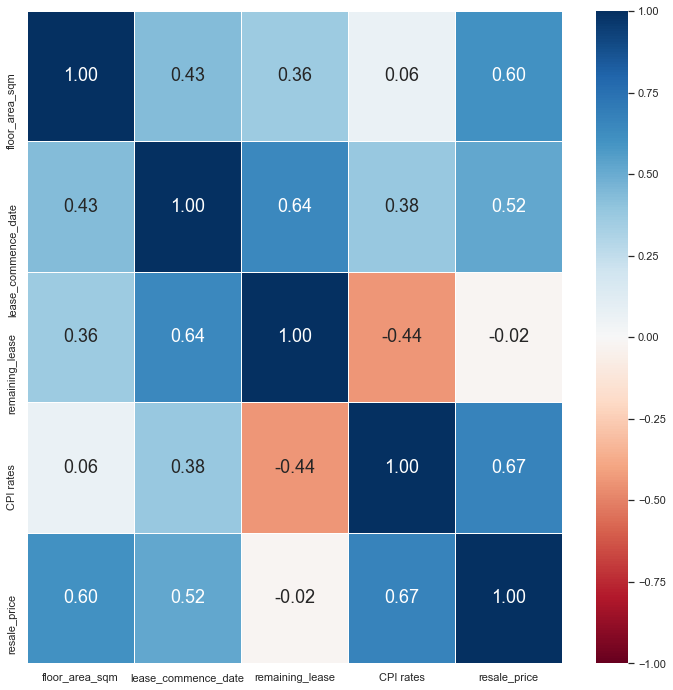

In [233]:
# Add resale price to the dataframe
resaleNum_data = pd.concat([resaleNum_data, resale_total["resale_price"]], axis = 1).reindex(resaleNum_data.index)

# Correlation Matrix
print(resaleNum_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(resaleNum_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

 CPI rates has highest correlation with the resale price and remaining lease has the lowest correlation with the resale price. It is interesting and unexpecting to see the low correlation between resale price and remaining lease as we usually expect a house with a longer lease to have higher value as we can stay in the house longer. On the other hand, the fact that CPI rate having the highest correlation with the resale price, as increasing CPI leads to higher inflation, which would eventually lead to rise in resale prices of the houses.

 It is not surprising to see that the correlation coefficient between floor area in square meter and the resale price as it is expeced that if the house is bigger the resale price would generally increase


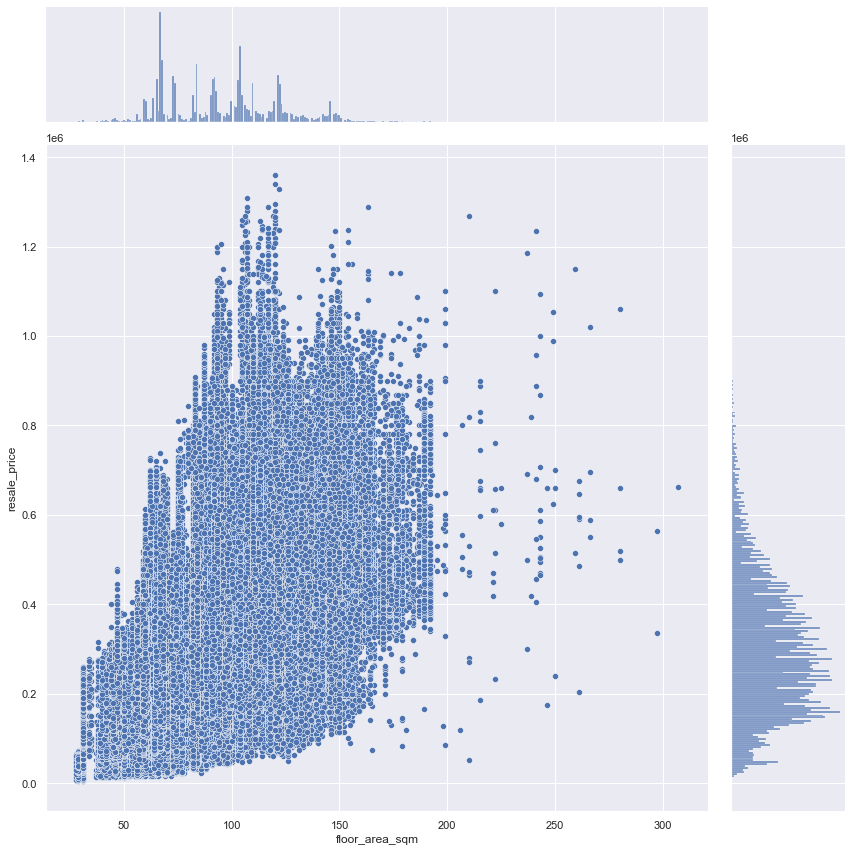

In [234]:
sb.jointplot(data = resaleNum_data, x = "floor_area_sqm", y = "resale_price", height = 12)

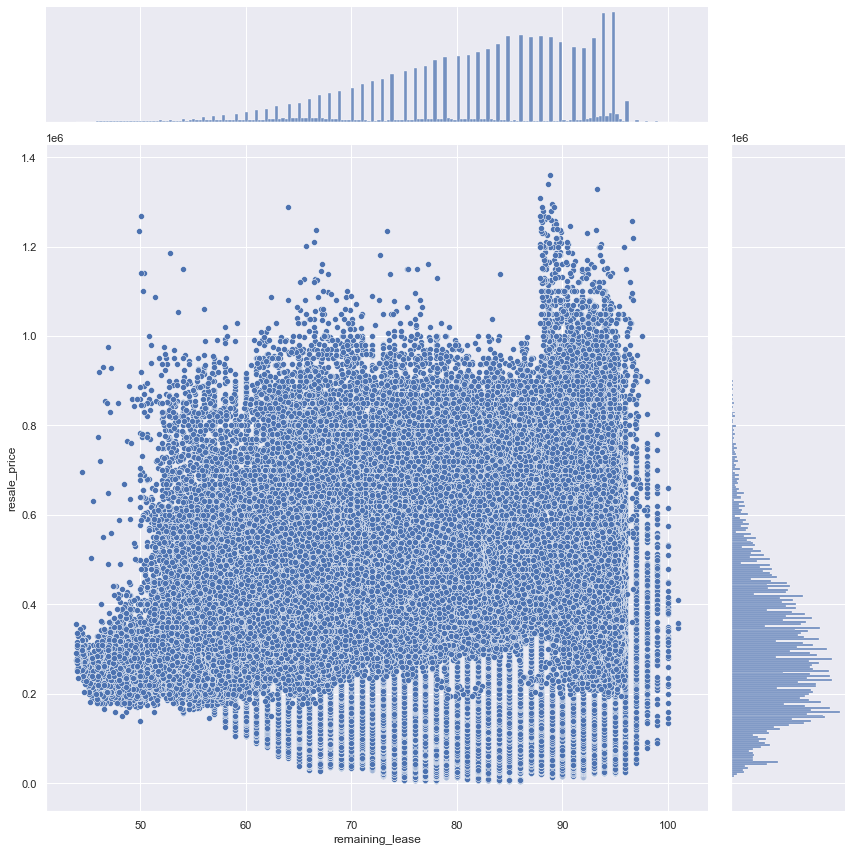

In [235]:
sb.jointplot(data = resaleNum_data, x = "remaining_lease", y = "resale_price", height = 12)

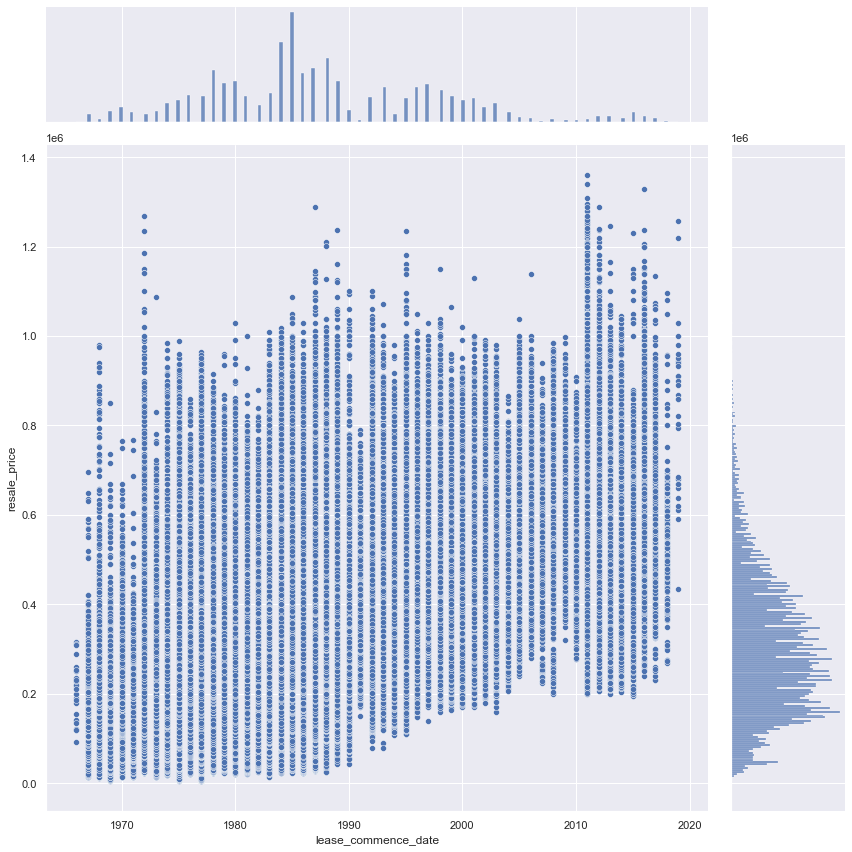

In [236]:
sb.jointplot(data = resaleNum_data, x = "lease_commence_date", y = "resale_price", height = 12)

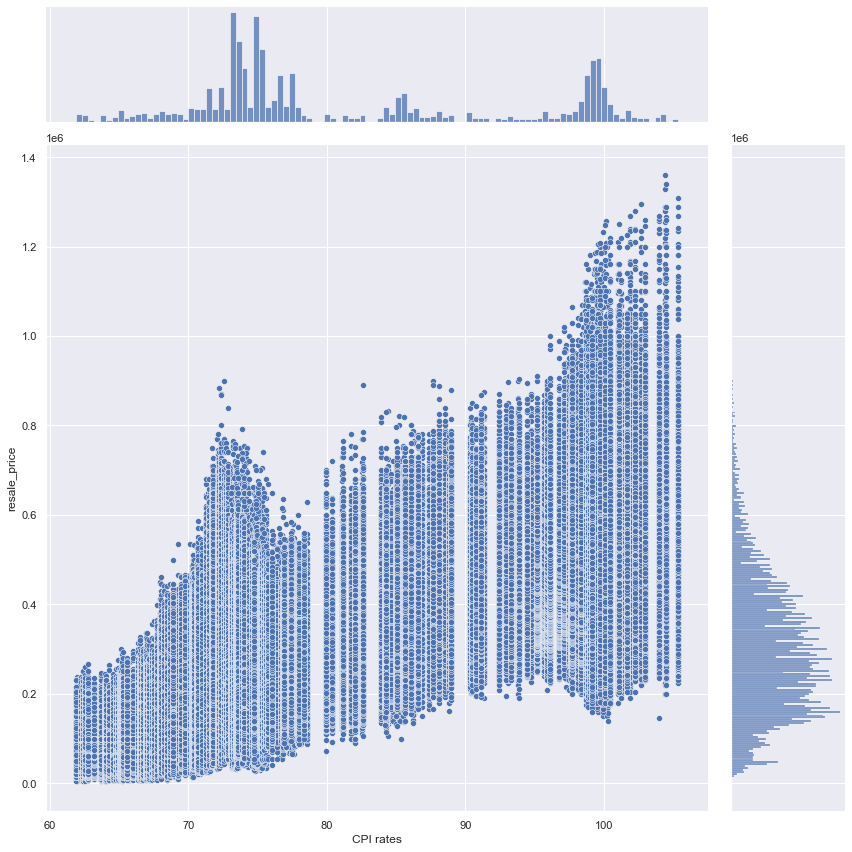

In [237]:
sb.jointplot(data = resaleNum_data, x = "CPI rates", y = "resale_price", height = 12)

From the diagrams, we can observe `CPI rates` has strongest linearity with resale price, followed by `floor_area_sqm` and `lease_commence date` and `remaining_lease` has weakest linearity.

# Observation
Which variables would help us predict `Resale Price` in this dataset?    

`CPI rates`: Most important variable, highest correlation of +0.67, and has strongest linearity.

`floor_area_sqm` and `lease_commence date`: Important variable as they have high correlation of +0.60 and +0.52 respectively, and strong linearity.

`Remaining_leas`e: Seems to be the least important variable with lowest correlation of -0.02 and weak linear relation

# Adding distance to nearest MRT

In [238]:
import pandas as pd
import numpy as np
import requests
import json

Given the reliability of our public transport and high cost of owning a car, Singaporeans are rather dependent on MRTs. Thus distance to the nearest MRT station is often one factor that homeowners consider when purchasing a house. We will be using OneMap API to calculate the distance between a flat and the nearest MRT station to analyse this effect
As we're finding nearest distance to MRT, we will first fetch the coordinates of the MRT stations in SIngapore. We will be taking note of a mrt station's latitude and longtitude in this case,
From Kaggle, we've found a a Singapore Train Station Coordinates dataset containing both MRT and LRT data.

## Retrieving MRT data

In [239]:
coordinatesMrtLrt = pd.read_csv("content/mrt_lrt_data.csv")
coordinatesMrtLrt

,station_name,type,lat,lng
0,Jurong East,MRT,1.333207,103.742308
1,Bukit Batok,MRT,1.349069,103.749596
2,Bukit Gombak,MRT,1.359043,103.751863
3,Choa Chu Kang,MRT,1.385417,103.744316
4,Yew Tee,MRT,1.397383,103.747523
...,...,...,...,...
152,Punggol Point,LRT,1.416932,103.906680
153,Samudera,LRT,1.415955,103.902185
154,Nibong,LRT,1.411865,103.900321
155,Sumang,LRT,1.408501,103.898605


For fairness of comparison, we will exclude all the LRT rows. This is because LRTs are only available in certain parts of Singapore and as it only links a small part together (Need rewrite this in actual english sentence lmao). Thus, cannot match fairly. (CAN consider a stronger justification or even make a seperate see if price increase model or sth?? idk haha)

Shreyas:
For fairness of comparison, we will exclude all the LRT rows. This is because LRTs are only available in Chua Chu Kang and Punggol and it only links a small part of them together. Hence it would be better to see the distance to the main MRT line which is Chua Chu Kang and Punggol.

In [240]:
coordinatesMrtLrt.drop(coordinatesMrtLrt.index[coordinatesMrtLrt["type"] == "LRT"], inplace=True)
coordinatesMrtLrt

,station_name,type,lat,lng
0,Jurong East,MRT,1.333207,103.742308
1,Bukit Batok,MRT,1.349069,103.749596
2,Bukit Gombak,MRT,1.359043,103.751863
3,Choa Chu Kang,MRT,1.385417,103.744316
4,Yew Tee,MRT,1.397383,103.747523
...,...,...,...,...
114,Bedok North,MRT,1.335268,103.918054
115,Bedok Reservoir,MRT,1.336595,103.933070
116,Tampines West,MRT,1.345583,103.938244
117,Tampines East,MRT,1.356310,103.955471


## Fetching coordinates of each HDB entry

In [241]:
## Helper Function for getting the full details of a certain address\
def find_postal(lst):
    '''With the block number and street name, get the full address of the hdb flat,
    including the postal code, geogaphical coordinates (lat/long)'''
    filename = "address_information"
    for index,add in enumerate(lst):
        url = "https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal="+ add
        print(index,url)
        # Retrieve information from website
        response = requests.get(url)
        try:
            data = json.loads(response.text) 
        except ValueError:
            print('JSONDecodeError')
            pass
        temp_df = pd.DataFrame.from_dict(data["results"])
        # The "add" is the address that was used to search in the website
        temp_df["address"] = add

        print(temp_df)
        # ADD the details of the addresses found into the file
        if index == 0:
            file = temp_df
        else:
            file = file.append(temp_df)
    file.to_csv(filename + '.csv')

Initially, tried to run find_postal on the full address but realised its not feasible as theres 800k dataset. Only 20k ran after 20 minutes so decided to go unique

In [242]:
## Get a list of block + streetname for find_postal ##
## Add a new row into the main df
resale_total['full_address'] = resale_total['block'] + " " + resale_total['street_name']
full_address = (resale_total['full_address']).tolist() #~800k
unique_address  = list(set(full_address)) #~9k
#unique_address_information = find_postal(unique_address)
## Insert full_adress to the respective entries in the resale_titak

In [243]:
#unique_address_information = find_postal(unique_address)
# Don't have to run this everytime if not take up alot of time. Output already saved as address_information
unique_address_information = pd.read_csv("address_information.csv")
unique_address_information.head()

,Unnamed: 0,SEARCHVAL,BLK_NO,ROAD_NAME,BUILDING,ADDRESS,POSTAL,X,Y,LATITUDE,LONGITUDE,LONGTITUDE,address
0,0,411 WOODLANDS STREET 41 SINGAPORE 730411,411,WOODLANDS STREET 41,NIL,411 WOODLANDS STREET 41 SINGAPORE 730411,730411,21267.398344,45583.449482,1.428514,103.772820,103.772820,411 WOODLANDS ST 41
1,0,533 BEDOK NORTH STREET 3 SINGAPORE 460533,533,BEDOK NORTH STREET 3,NIL,533 BEDOK NORTH STREET 3 SINGAPORE 460533,460533,38116.233293,35086.222065,1.333580,103.924219,103.924219,533 BEDOK NTH ST 3
2,0,EUNOS DAMAI VILLE,657,JALAN TENAGA,EUNOS DAMAI VILLE,657 JALAN TENAGA EUNOS DAMAI VILLE SINGAPORE 4...,410657,36209.954195,35113.899261,1.333831,103.907090,103.907090,657 JLN TENAGA
3,0,103 HOUGANG AVENUE 1 SINGAPORE 530103,103,HOUGANG AVENUE 1,NIL,103 HOUGANG AVENUE 1 SINGAPORE 530103,530103,34348.075051,37485.814210,1.355282,103.890360,103.890360,103 HOUGANG AVE 1
4,0,351C CANBERRA ROAD SINGAPORE 753351,351C,CANBERRA ROAD,NIL,351C CANBERRA ROAD SINGAPORE 753351,753351,26491.941514,48106.785710,1.451335,103.819767,103.819767,351C CANBERRA RD


## Find nearest MRT of each HDB entry

In [244]:
## Function for getting closest distance of each location from a list of amenities location

from geopy.distance import geodesic

def find_nearest(house, amenity, radius=2):
    """
    this function finds the nearest locations from the 2nd table from the 1st address
    Both are dataframes with a specific format:
        1st column: any string column ie addresses taken from the "find_postal_address.py"
        2nd column: latitude (float)
        3rd column: longitude (float)
    Column name doesn't matter.
    It also finds the number of amenities within the given radius (default=2)
    """
    results = {}
    # first column must be address
    for index,flat in enumerate(house.iloc[:,0]):
        
        # 2nd column must be latitude, 3rd column must be longitude
        flat_loc = (house.iloc[index,1],house.iloc[index,2])
        flat_amenity = ['','',100,0]
        for ind, eachloc in enumerate(amenity.iloc[:,0]):
            amenity_loc = (amenity.iloc[ind,1],amenity.iloc[ind,2])
            distance = geodesic(flat_loc,amenity_loc)
            distance = float(str(distance)[:-3]) # convert to float

            if distance <= radius:   # compute number of amenities in 2km radius
                flat_amenity[3] += 1

            if distance < flat_amenity[2]: # find nearest amenity
                flat_amenity[0] = flat
                flat_amenity[1] = eachloc
                flat_amenity[2] = distance

        results[flat] = flat_amenity
    return results

In [245]:
# find_nearest require both input location to be in df["string", latitude, longtitude] format

#uai_input = unique_address_information[["queried_address", "LATITUDE", "LONGITUDE"]]
#uai_input.head()
#coordinatesMrtLrt = coordinatesMrtLrt.drop(columns = ['type'])
#coordinatesMrtLrt.head()

##!! Don't have to run this everytime if not take up alot of time. Output already saved as address_information
#address_mrt = find_nearest(uai_input, coordinatesMrtLrt) 

## INSTEAD, we just take from csv that we saved in recently
address_mrt = pd.read_csv("address_mrt.csv")
address_mrt.head()

,full_address,nearest_mrt_station,distance,num_mrt_2km
0,8A UPP BOON KENG RD,Kallang,0.237352,11
1,150 TAMPINES ST 12,Tampines,0.389390,5
2,15 GHIM MOH RD,Buona Vista,0.269566,6
3,210 SERANGOON CTRL,Serangoon,0.560370,5
4,501 BEDOK NTH ST 3,Bedok Reservoir,0.587305,5


In [246]:
## Combine new MRT information into resale_current given the same address

## Insert the nearest mrt and its corresponsing distance into a new csv

In [247]:
'''for i in sample_hdb.index:
    for j in address_mrt.index:
        if(address_mrt['full_address'][j] == sample_hdb['full_address'][i]):
            sample_hdb['nearest_mrt_station'][i] = address_mrt['nearest_mrt_station'][j]
            sample_hdb['distance_to_nearest_mrt'][i] = address_mrt['distance'][j]
            break

for i in sample_hdb.index:
    print(i)
    temp = address_mrt.loc[address_mrt['full_address'] == sample_hdb["full_address"][i]]
    temp['nearest_mrt_station'] = address_mrt["nearest_mrt_station"][i]
    temp['distance_to_nearest_mrt'] = address_mrt["distance_to_nearest_mrt"][i]'''

'''for i in address_mrt.index:
    temp = resale_total.loc[resale_total['full_address'] == address_mrt["full_address"][i], ['nearest_mrt_station', 'distance_to_nearest_mrt']] = [address_mrt["nearest_mrt_station"][i], address_mrt["distance"][i]]
    print(temp)
resale_total.to_csv('resale_complete.csv')'''

## NO NEED RUN THIS, COS ALR SAVED INSIDE CSV

'for i in address_mrt.index:\n    temp = resale_total.loc[resale_total[\'full_address\'] == address_mrt["full_address"][i], [\'nearest_mrt_station\', \'distance_to_nearest_mrt\']] = [address_mrt["nearest_mrt_station"][i], address_mrt["distance"][i]]\n    print(temp)\nresale_total.to_csv(\'resale_complete.csv\')'

# Data Preparation for Model Training

In [248]:
final = pd.read_csv("resale_complete.csv")
final.head()

,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,CPI rates,real_price,full_address,nearest_mrt_station,distance_to_nearest_mrt
0,0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,86.0,9000.0,61.966,14524.093858,309 ANG MO KIO AVE 1,NaN,NaN
1,1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,86.0,6000.0,61.966,9682.729239,309 ANG MO KIO AVE 1,NaN,NaN
2,2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,86.0,8000.0,61.966,12910.305651,309 ANG MO KIO AVE 1,NaN,NaN
3,3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,86.0,6000.0,61.966,9682.729239,309 ANG MO KIO AVE 1,NaN,NaN
4,4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,85.0,47200.0,61.966,76170.803344,216 ANG MO KIO AVE 1,Ang Mo Kio,0.994162


In [249]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868209 entries, 0 to 868208
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               868209 non-null  int64  
 1   month                    868209 non-null  object 
 2   town                     868209 non-null  object 
 3   flat_type                868209 non-null  object 
 4   block                    868209 non-null  object 
 5   street_name              868209 non-null  object 
 6   storey_range             868209 non-null  object 
 7   floor_area_sqm           868209 non-null  float64
 8   flat_model               868209 non-null  object 
 9   lease_commence_date      868209 non-null  int64  
 10  remaining_lease          868209 non-null  float64
 11  resale_price             868209 non-null  float64
 12  CPI rates                867233 non-null  float64
 13  real_price               868209 non-null  float64
 14  full

In [250]:
final.drop('Unnamed: 0',axis=1,inplace=True)
final.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,CPI rates,real_price,full_address,nearest_mrt_station,distance_to_nearest_mrt
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,86.0,9000.0,61.966,14524.093858,309 ANG MO KIO AVE 1,NaN,NaN
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,86.0,6000.0,61.966,9682.729239,309 ANG MO KIO AVE 1,NaN,NaN
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,86.0,8000.0,61.966,12910.305651,309 ANG MO KIO AVE 1,NaN,NaN
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,86.0,6000.0,61.966,9682.729239,309 ANG MO KIO AVE 1,NaN,NaN
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,85.0,47200.0,61.966,76170.803344,216 ANG MO KIO AVE 1,Ang Mo Kio,0.994162


#### One Hot Encoding for flat_type and Town

In [251]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

final["town_cat"] = le.fit_transform(final["town"])
final["flat_type_cat"] = le.fit_transform(final["flat_type"])

final.insert(2,"town_cat",final.pop("town_cat"))
final.insert(4,"flat_type_cat",final.pop("flat_type_cat"))
final.head()

,month,town,town_cat,flat_type,flat_type_cat,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,CPI rates,real_price,full_address,nearest_mrt_station,distance_to_nearest_mrt
0,1990-01-01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,86.0,9000.0,61.966,14524.093858,309 ANG MO KIO AVE 1,NaN,NaN
1,1990-01-01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,86.0,6000.0,61.966,9682.729239,309 ANG MO KIO AVE 1,NaN,NaN
2,1990-01-01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,86.0,8000.0,61.966,12910.305651,309 ANG MO KIO AVE 1,NaN,NaN
3,1990-01-01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,86.0,6000.0,61.966,9682.729239,309 ANG MO KIO AVE 1,NaN,NaN
4,1990-01-01,ANG MO KIO,0,3 ROOM,2,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,85.0,47200.0,61.966,76170.803344,216 ANG MO KIO AVE 1,Ang Mo Kio,0.994162


In [252]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868209 entries, 0 to 868208
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    868209 non-null  object 
 1   town                     868209 non-null  object 
 2   town_cat                 868209 non-null  int32  
 3   flat_type                868209 non-null  object 
 4   flat_type_cat            868209 non-null  int32  
 5   block                    868209 non-null  object 
 6   street_name              868209 non-null  object 
 7   storey_range             868209 non-null  object 
 8   floor_area_sqm           868209 non-null  float64
 9   flat_model               868209 non-null  object 
 10  lease_commence_date      868209 non-null  int64  
 11  remaining_lease          868209 non-null  float64
 12  resale_price             868209 non-null  float64
 13  CPI rates                867233 non-null  float64
 14  real

In [253]:
#Filling NA values for distance to nearest mrt
grouping = final.groupby(["town"]).mean()
grouping.reset_index(inplace=True)
grouping

,town,town_cat,flat_type_cat,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,CPI rates,real_price,distance_to_nearest_mrt
0,ANG MO KIO,0.0,2.436540,81.405507,1980.717396,76.423116,245272.565679,79.482200,296382.778114,0.796015
1,BEDOK,1.0,2.768135,88.114056,1981.968597,77.634749,264722.369862,79.641450,322375.279356,0.626609
2,BISHAN,2.0,3.344279,105.750405,1988.362588,83.496327,407898.751697,80.213333,498379.735401,0.792252
3,BUKIT BATOK,3.0,2.867646,92.860867,1987.246365,82.659082,260958.707036,79.828306,318407.022674,0.627683
4,BUKIT MERAH,4.0,2.554115,81.734064,1982.364580,76.209343,332532.938299,81.862896,386400.673207,0.679460
5,BUKIT PANJANG,5.0,3.314516,103.571379,1994.539203,86.295208,318342.999580,84.322228,369160.460843,0.936922
6,BUKIT TIMAH,6.0,3.429825,108.462782,1983.317878,78.020607,436135.155388,80.670658,525457.592243,0.313771
7,CENTRAL AREA,7.0,2.281562,72.713355,1982.282904,76.521948,321491.330732,81.430746,368528.457103,0.301521
8,CHOA CHU KANG,8.0,3.484962,112.101229,1994.649636,87.179213,332742.305597,83.053316,397597.897451,0.688327
9,CLEMENTI,9.0,2.558715,83.469270,1981.024099,76.819042,270930.583739,79.379537,327795.931141,0.737852


In [254]:
row_count = 0
for i in final.distance_to_nearest_mrt:
    if np.isnan(i):
        final.iloc[row_count,17] = grouping.loc[grouping["town"] == final.iloc[row_count,1]]["distance_to_nearest_mrt"]
    row_count+=1

In [255]:
final.head()

,month,town,town_cat,flat_type,flat_type_cat,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,CPI rates,real_price,full_address,nearest_mrt_station,distance_to_nearest_mrt
0,1990-01-01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,86.0,9000.0,61.966,14524.093858,309 ANG MO KIO AVE 1,NaN,0.796015
1,1990-01-01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,86.0,6000.0,61.966,9682.729239,309 ANG MO KIO AVE 1,NaN,0.796015
2,1990-01-01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,86.0,8000.0,61.966,12910.305651,309 ANG MO KIO AVE 1,NaN,0.796015
3,1990-01-01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,86.0,6000.0,61.966,9682.729239,309 ANG MO KIO AVE 1,NaN,0.796015
4,1990-01-01,ANG MO KIO,0,3 ROOM,2,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,85.0,47200.0,61.966,76170.803344,216 ANG MO KIO AVE 1,Ang Mo Kio,0.994162


In [256]:
group2 = pd.DataFrame(final[["town","nearest_mrt_station"]])
group2.head()

,town,nearest_mrt_station
0,ANG MO KIO,NaN
1,ANG MO KIO,NaN
2,ANG MO KIO,NaN
3,ANG MO KIO,NaN
4,ANG MO KIO,Ang Mo Kio


In [257]:
df = pd.DataFrame(group2.groupby("town").value_counts())
df.reset_index(level="nearest_mrt_station",inplace=True)
df["counts"] = df[0]

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, ANG MO KIO to YISHUN
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nearest_mrt_station  121 non-null    object
 1   0                    121 non-null    int64 
 2   counts               121 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.8+ KB


In [259]:
row_count = 0
for i in final.nearest_mrt_station:
    if pd.isnull(i):
        final.iloc[row_count,16] = df.loc[final.iloc[row_count,1]]["nearest_mrt_station"][0]
    row_count+=1

In [260]:
final.head()

,month,town,town_cat,flat_type,flat_type_cat,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,CPI rates,real_price,full_address,nearest_mrt_station,distance_to_nearest_mrt
0,1990-01-01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,86.0,9000.0,61.966,14524.093858,309 ANG MO KIO AVE 1,Ang Mo Kio,0.796015
1,1990-01-01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,86.0,6000.0,61.966,9682.729239,309 ANG MO KIO AVE 1,Ang Mo Kio,0.796015
2,1990-01-01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,86.0,8000.0,61.966,12910.305651,309 ANG MO KIO AVE 1,Ang Mo Kio,0.796015
3,1990-01-01,ANG MO KIO,0,1 ROOM,0,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,86.0,6000.0,61.966,9682.729239,309 ANG MO KIO AVE 1,Ang Mo Kio,0.796015
4,1990-01-01,ANG MO KIO,0,3 ROOM,2,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,85.0,47200.0,61.966,76170.803344,216 ANG MO KIO AVE 1,Ang Mo Kio,0.994162


In [261]:
# drop some unnecessary columns
final =final.drop('month',axis=1)
final =final.drop('block',axis=1)
final =final.drop('street_name',axis=1)
final =final.drop('town',axis=1)
final =final.drop('full_address',axis=1)
final =final.drop('flat_model',axis=1)
final = final.drop('flat_type',axis=1)
final = final.drop('remaining_lease',axis=1)
final = final.drop('resale_price',axis = 1)
final = final.drop('CPI rates',axis=1)

In [262]:
final.insert(7,"real_price",final.pop("real_price"))
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868209 entries, 0 to 868208
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   town_cat                 868209 non-null  int32  
 1   flat_type_cat            868209 non-null  int32  
 2   storey_range             868209 non-null  object 
 3   floor_area_sqm           868209 non-null  float64
 4   lease_commence_date      868209 non-null  int64  
 5   nearest_mrt_station      868209 non-null  object 
 6   distance_to_nearest_mrt  868209 non-null  float64
 7   real_price               868209 non-null  float64
dtypes: float64(3), int32(2), int64(1), object(2)
memory usage: 46.4+ MB


                         town_cat  flat_type_cat  floor_area_sqm  \
town_cat                 1.000000       0.139799        0.135965   
flat_type_cat            0.139799       1.000000        0.952547   
floor_area_sqm           0.135965       0.952547        1.000000   
lease_commence_date      0.217048       0.448403        0.431667   
distance_to_nearest_mrt  0.093719       0.113068        0.114711   
real_price               0.054503       0.726418        0.716876   

                         lease_commence_date  distance_to_nearest_mrt  \
town_cat                            0.217048                 0.093719   
flat_type_cat                       0.448403                 0.113068   
floor_area_sqm                      0.431667                 0.114711   
lease_commence_date                 1.000000                 0.187623   
distance_to_nearest_mrt             0.187623                 1.000000   
real_price                          0.484803                 0.013029   

           

<AxesSubplot:>

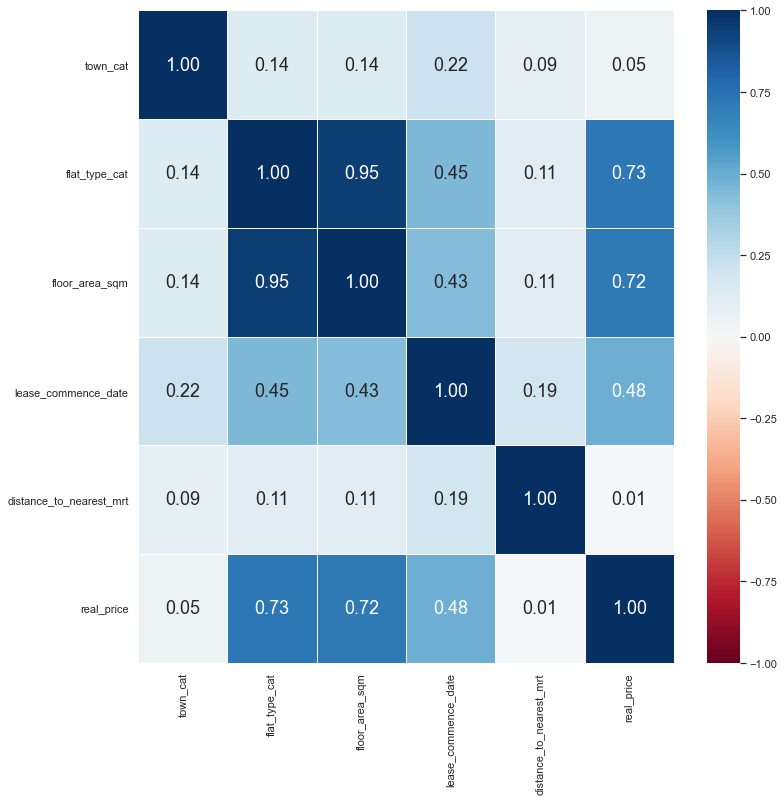

In [263]:
print(final.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(final.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### Data splitting for Training and training the model

In [264]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = final.drop(["real_price","nearest_mrt_station"],axis = 1)
# Temporairly change storey range to int
X["storey_range"] = X["storey_range"].apply(lambda x:x[:2])
y = final["real_price"].values


In [265]:
X.head()

,town_cat,flat_type_cat,storey_range,floor_area_sqm,lease_commence_date,distance_to_nearest_mrt
0,0,0,10,31.0,1977,0.796015
1,0,0,04,31.0,1977,0.796015
2,0,0,10,31.0,1977,0.796015
3,0,0,07,31.0,1977,0.796015
4,0,2,04,73.0,1976,0.994162


In [266]:
y

array([ 14524.09385792,   9682.72923861,  12910.30565149, ...,
       800000.        , 788000.        , 800000.        ])

In [267]:
#feature scaling
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [268]:
scalar = preprocessing.StandardScaler()
X_train = scalar.fit_transform(X_train.astype(np.float64))
X_test = scalar.transform(X_test.astype(np.float64))

# Model 1:KNeighborsRegressor

In [269]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [270]:
# Fit the KNN model on train data
knn.fit(X_train,y_train)
# Predict test data using the trained model
predicts_knn = knn.predict(X_test)

In [271]:
# Get evaluation metrics on test set
from sklearn.metrics import r2_score, mean_squared_error

mse_knn = mean_squared_error(y_test, predicts_knn)
rmse_knn = mse_knn ** (1/2)
print("RMSE:", rmse_knn)
score_knn = r2_score(y_test, predicts_knn)
print("R-squared:", score_knn)

RMSE: 88652.20947967647
R-squared: 0.693447483844215


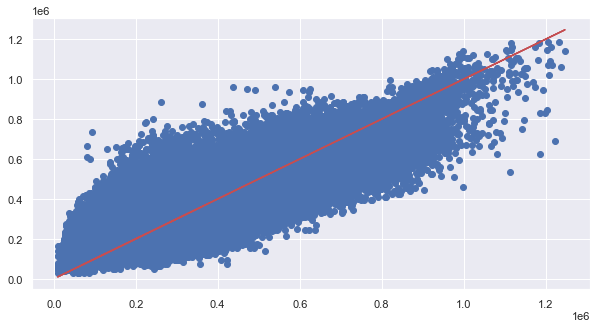

In [272]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,predicts_knn)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [273]:
predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicts_knn,'Error': y_test-predicts_knn})
predictions.head(20)

,Actual,Predicted,Error
0,362282.175312,336637.960511,25644.214801
1,357033.831942,421982.483616,-64948.651674
2,320492.026625,420763.269003,-100271.242377
3,380403.334691,222676.709279,157726.625411
4,442211.055276,448942.712126,-6731.656850
5,393498.485504,294261.382682,99237.102822
6,406820.123086,241861.961006,164958.162080
7,769238.504158,747907.807967,21330.696191
8,273153.143310,255530.846670,17622.296640
9,192912.560285,268602.816748,-75690.256463


# Model 2: Random Forest

In [274]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error #change

rfr = RandomForestRegressor()

In [275]:
# Fit the RFR model on train data
rfr.fit(X_train, y_train)
# Predict test data using the trained model
predicts_rfr = rfr.predict(X_test)


In [276]:
# Get evaluation metrics on test set
mse_rfr = mean_squared_error(y_test, predicts_rfr)
rmse_rfr = mse_rfr ** (1/2)
print("RMSE:", rmse_rfr)
score_rfr = r2_score(y_test, predicts_rfr)
print("R-squared2:", score_rfr)

RMSE: 86707.78088510674
R-squared2: 0.7067473805868661


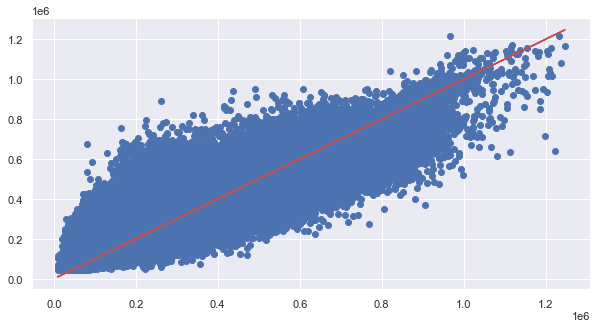

In [277]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,predicts_rfr)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [278]:
predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicts_rfr,'Error': y_test-predicts_rfr})
predictions.head(20)

,Actual,Predicted,Error
0,362282.175312,324183.530318,38098.644994
1,357033.831942,398193.135234,-41159.303292
2,320492.026625,442921.150964,-122429.124338
3,380403.334691,245366.123958,135037.210733
4,442211.055276,447020.214291,-4809.159015
5,393498.485504,333808.152789,59690.332715
6,406820.123086,243095.381951,163724.741135
7,769238.504158,746115.371181,23123.132977
8,273153.143310,252372.387035,20780.756275
9,192912.560285,255529.768982,-62617.208697


# Model 3: XGBoost

In [279]:
import xgboost as xgb

## Dataprep specifically for XG Boost

In [280]:
from sklearn import preprocessing


In [281]:
# Convert our dataset into Dmatrix that XGBoost supports to reap it's efficiency
lbl = preprocessing.LabelEncoder()
X['storey_range'] = lbl.fit_transform(X['storey_range'].astype(str))
final_dmatrix = xgb.DMatrix(data=X,label=y, enable_categorical = "True")

In [282]:
#feature scaling
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

## Actl doing the model


In [283]:

xg_reg = xgb.XGBRegressor(objective ='reg:linear')
# Fit the XGboost model on train data
xg_reg.fit(X_train,y_train)
# Predict test data using the trained model
predicts_xgb = xg_reg.predict(X_test)


[14:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [284]:
# Get evaluation metrics on test set
mse_xgb = mean_squared_error(y_test, predicts_xgb)
rmse_xgb = mse_xgb ** (1/2)
print("RMSE:", rmse_xgb)
score_xgb = r2_score(y_test, predicts_xgb)
print("R-squared:", score_xgb)

RMSE: 81166.35549033414
R-squared: 0.7438153674655514


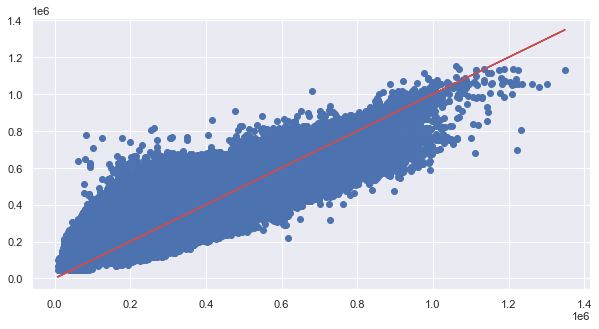

In [285]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,predicts_xgb)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [286]:
predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicts_xgb,'Error': y_test-predicts_xgb})
predictions.head(20)

,Actual,Predicted,Error
0,298172.378714,220627.437500,77544.941214
1,267533.475126,250351.562500,17181.912626
2,369731.619732,340870.281250,28861.338482
3,375013.993059,337172.062500,37841.930559
4,289799.861223,317228.656250,-27428.795027
5,335525.966792,335827.843750,-301.876958
6,73396.214629,241372.593750,-167976.379121
7,383621.385883,359020.593750,24600.792133
8,227914.363016,351758.750000,-123844.386984
9,312035.266624,358682.437500,-46647.170876


# Improving our model

With a quick glance of the actual and predicted values realised that many data from the 1990s have actual resale prices of about <150k which would be impossible in today's housing market. Thus, we decide to remove all data with resale price < 150000 and see if there is any improvement in model accuracy. Will use XGBoost as it providede the best RMSE and explained variance

In [287]:
count = final["real_price"][final["real_price"] < 150000].count()
print("Number of transactions < 150k: ", count)

Number of transactions < 150k:  61750


In [288]:
# Drop those transactions
final_2 = final[~(final['real_price'] < 150000)]  

In [289]:
final_2

,town_cat,flat_type_cat,storey_range,floor_area_sqm,lease_commence_date,nearest_mrt_station,distance_to_nearest_mrt,real_price
113,0,3,10 TO 12,98.0,1978,Ang Mo Kio,0.354739,150082.303199
129,0,3,10 TO 12,91.0,1980,Yio Chu Kang,0.208728,155730.561921
137,0,4,13 TO 15,119.0,1979,Ang Mo Kio,1.186827,193654.584772
138,0,4,10 TO 12,119.0,1979,Ang Mo Kio,0.599638,193654.584772
139,0,4,10 TO 12,119.0,1979,Ang Mo Kio,0.371138,256592.324823
...,...,...,...,...,...,...,...,...
868204,26,5,01 TO 03,145.0,1988,Yishun,1.211838,682000.000000
868205,26,5,04 TO 06,146.0,1988,Yishun,1.361630,720000.000000
868206,26,5,10 TO 12,146.0,1988,Yishun,1.187966,800000.000000
868207,26,5,10 TO 12,146.0,1985,Yishun,0.937977,788000.000000


In [290]:
# Splitting to test and train
X = final_2.drop(["real_price","nearest_mrt_station"],axis = 1)
y = final_2["real_price"].values
X["storey_range"] = X["storey_range"].apply(lambda x:x[:2])
X['storey_range'] = lbl.fit_transform(X['storey_range'].astype(str))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

scalar = preprocessing.StandardScaler()
X_train = scalar.fit_transform(X_train.astype(np.float64))
X_test = scalar.transform(X_test.astype(np.float64))

In [292]:
xg_reg.fit(X_train,y_train)
# Predict test data using the trained model
predicts_xgb = xg_reg.predict(X_test)


[14:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [293]:
# Get evaluation metrics on test set
mse_xgb = mean_squared_error(y_test, predicts_xgb)
rmse_xgb = mse_xgb ** (1/2)
print("RMSE:", rmse_xgb)
score_xgb = r2_score(y_test, predicts_xgb)
print("R-squared:", score_xgb)

RMSE: 73407.20966205785
R-squared: 0.753737448374014


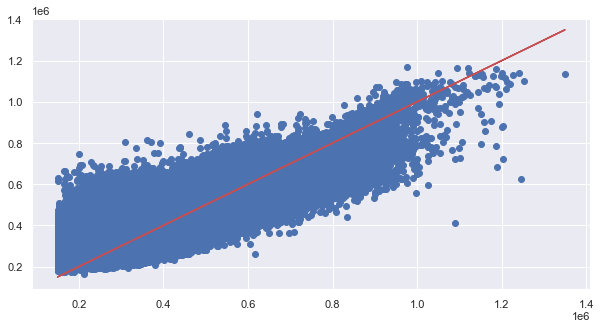

In [294]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,predicts_xgb)
# Perfect predictions
plt.plot(y_test,y_test,'r')

We can see a significant drop in RMSE, and increase in explained variance (r2) significying a increase in accuracy. Thus, this model is better than the other models discussed,

# Conclusion

- Remaining lease has minimum correlation with resale price unexpectedly, so it seems to be less important factor affecting HDB resale prices
- Lease commence date and floor area is important variables as they have high correlation and linearity with HDB resale price
- Storey range, flat level and flat type are important variables that cause variations to HDB sale prices, while town seems to be less important
